In [83]:
# Various modeling lessons and breakfast hours from DSI 523
# https://medium.com/towards-data-science/loss-functions-and-their-use-in-neural-networks-a470e703f1e9
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanAbsoluteError
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/Huber
# https://towardsdatascience.com/what-is-batch-normalization-46058b4f583

# Imports
---

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter("ignore")

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.losses import MeanAbsoluteError, Huber

In [2]:
a_df = pd.read_csv('../data/average/a_df.csv')
h_df = pd.read_csv('../data/high/h_df.csv')

# Average Cycling Performance
---

In [3]:
a_df.head()

,timestamp,latitude,longitude,elevation,dt,heart_rate,bearing,time_diff_s,total_time_s,ele_diff_m,total_ele_change_m,lat_lon,dist_diff_km,total_dist_km,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg
0,2022-07-20 16:07:45+00:00,38.773466,-121.363686,35.799999,1658333265,78,0.000000,0,0,0.000000,0.0,"(38.77346634864807, -121.36368582956493)",0.0000,0.0000,297.65,297.17,1019,39,282.80,1,0.45,177
1,2022-07-20 16:07:46+00:00,38.773542,-121.363672,35.599998,1658333266,79,8.292053,1,1,-0.200001,-0.2,"(38.77354153431952, -121.36367183178663)",0.0084,0.0084,297.65,297.17,1019,39,282.80,1,0.45,177
2,2022-07-20 16:07:49+00:00,38.773630,-121.363682,35.200001,1658333269,82,-5.321180,3,4,-0.399998,-0.6,"(38.77363029867411, -121.36368239298463)",0.0099,0.0183,297.65,297.17,1019,39,282.80,1,0.45,177
3,2022-07-20 16:07:51+00:00,38.773789,-121.363733,35.000000,1658333271,83,-13.956066,2,6,-0.200001,-0.8,"(38.77378871664405, -121.36373268440366)",0.0181,0.0364,297.67,297.17,1019,38,282.43,1,0.45,177
4,2022-07-20 16:07:52+00:00,38.773786,-121.363766,35.000000,1658333272,83,-96.936537,1,7,0.000000,-0.8,"(38.77378553152084, -121.36376612819731)",0.0029,0.0393,297.67,297.17,1019,38,282.43,1,0.45,177


## X, y, train_test_split

In [4]:
a_df.columns

Index(['timestamp', 'latitude', 'longitude', 'elevation', 'dt', 'heart_rate',
       'bearing', 'time_diff_s', 'total_time_s', 'ele_diff_m',
       'total_ele_change_m', 'lat_lon', 'dist_diff_km', 'total_dist_km',
       'temp', 'feels_like', 'pressure', 'humidity', 'dew_point', 'clouds',
       'wind_speed', 'wind_deg'],
      dtype='object')

In [5]:
a_features = ['elevation', 'bearing', 'time_diff_s', 'total_time_s', 'ele_diff_m',
       'total_ele_change_m', 'dist_diff_km', 'total_dist_km',
       'temp', 'feels_like', 'pressure', 'humidity', 'dew_point', 'clouds',
       'wind_speed', 'wind_deg']
a_X = a_df[a_features]
a_y = a_df['heart_rate']

a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X, a_y, random_state = 42)

In [6]:
a_y.mean()

130.21652421652422

### StandardScaler X_train and X_test for testing

In [7]:
a_ss = StandardScaler()
a_X_train_sc = a_ss.fit_transform(a_X_train)
a_X_test_sc = a_ss.transform(a_X_test)

### Polynomial X_train and X_test for testing

In [8]:
a_poly = PolynomialFeatures()
a_X_train_sc_p = a_poly.fit_transform(a_X_train_sc)
a_X_test_sc_p = a_poly.fit_transform(a_X_test_sc)

## Linear Regression

In [9]:
a_lr = LinearRegression()
a_lr.fit(a_X_train_sc, a_y_train)
print(f'Linear Regression Train Score: {a_lr.score(a_X_train_sc, a_y_train)}')
print(f'Linear Regression Test Score: {a_lr.score(a_X_test_sc, a_y_test)}')

Linear Regression Train Score: 0.5260233155015783
Linear Regression Test Score: 0.5322513167399172


### Linear Regression Pipeline (StandardScaler, Polynomial)

In [10]:
a_lr_pipe = Pipeline([
    ('a_ss', StandardScaler()),
    ('a_poly', PolynomialFeatures()),
    ('a_lr', LinearRegression())
])

a_lr_pipe.fit(a_X_train, a_y_train)
print(f'LR Pipe Train Score: {a_lr_pipe.score(a_X_train, a_y_train)}')
print(f'LR Pipe Test Score: {a_lr_pipe.score(a_X_test, a_y_test)}')

LR Pipe Train Score: 0.8082482755481244
LR Pipe Test Score: 0.7906546450250773


### AdaBoost with Linear Regression Base Estimator

In [11]:
a_ada_lr = AdaBoostRegressor(base_estimator = LinearRegression(), random_state = 42)

a_ada_lr.fit(a_X_train_sc_p, a_y_train)
print(f'Ada LR Train Score: {a_ada_lr.score(a_X_train_sc_p, a_y_train)}')
print(f'Ada LR Test Score: {a_ada_lr.score(a_X_test_sc_p, a_y_test)}')

Ada LR Train Score: 0.8046423913777858
Ada LR Test Score: 0.776694380832758


## AdaBoost with Decision Tree Base Estimator

In [13]:
a_ada_dt = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(), random_state = 42)

a_ada_dt_params = {
    'n_estimators': [50, 100, 150, 200],
    'base_estimator__max_depth': [1, 2, 5]
}

a_gs_ada_dt = GridSearchCV(a_ada_dt, param_grid = a_ada_dt_params, cv = 5)
a_gs_ada_dt.fit(a_X_train_sc, a_y_train)
print(a_gs_ada_dt.best_score_)
print(a_gs_ada_dt.best_params_)
print(f'Ada DT Train Score: {a_gs_ada_dt.score(a_X_train_sc, a_y_train)}')
print(f'Ada DT Test Score: {a_gs_ada_dt.score(a_X_test_sc, a_y_test)}')

0.868164587298871
{'base_estimator__max_depth': 5, 'n_estimators': 200}
Ada DT Train Score: 0.8756108134812447
Ada DT Test Score: 0.8730399805443708


## AdaBoost with Random Forest Base Estimator

In [16]:
'''
a_ada_rf = AdaBoostRegressor(base_estimator = RandomForestRegressor(), random_state = 42)

a_ada_rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'base_estimator__max_depth': [1, 2, 5]
}

a_gs_ada_rf = GridSearchCV(a_ada_rf, param_grid = a_ada_rf_params, cv = 5)
a_gs_ada_rf.fit(a_X_train_sc, a_y_train)
print(a_gs_ada_rf.best_score_)
print(a_gs_ada_rf.best_params_)
print(f'Ada DT Train Score: {a_gs_ada_rf.score(a_X_train_sc, a_y_train)}')
print(f'Ada DT Test Score: {a_gs_ada_rf.score(a_X_test_sc, a_y_test)}')
'''
'''
0.844253394135492
{'base_estimator__max_depth': 5, 'n_estimators': 50}
Ada DT Train Score: 0.8526320077631239
Ada DT Test Score: 0.8512220020729748
'''

0.844253394135492
{'base_estimator__max_depth': 5, 'n_estimators': 50}
Ada DT Train Score: 0.8526320077631239
Ada DT Test Score: 0.8512220020729748


## Neural Net Regression

In [88]:
a_X_nn = a_df[a_features]
a_y_nn = a_df['heart_rate']

a_X_nn = np.array(a_X_nn)
a_y_nn = np.array(a_y_nn)

a_X_nn_train, a_X_nn_test, a_y_nn_train, a_y_nn_test = train_test_split(a_X_nn, a_y_nn, random_state = 42)

a_ss_nn = StandardScaler()
a_X_nn_train_sc = a_ss_nn.fit_transform(a_X_nn_train)
a_X_nn_test_sc = a_ss.transform(a_X_nn_test)

In [89]:
a_X_nn[0].shape

(16,)

In [90]:
a_model_nn = Sequential()

a_model_nn.add(Dense(128, input_dim = 16, activation = 'relu'))

a_model_nn.add(BatchNormalization())
a_model_nn.add(Dense(64, activation = 'relu', kernel_regularizer = l2(.05)))
a_model_nn.add(Dense(128, activation = 'relu', kernel_regularizer = l2(.1)))
a_model_nn.add(Dense(64, activation = 'relu', kernel_regularizer = l2(.05)))
a_model_nn.add(Dense(128, activation = 'relu', kernel_regularizer = l2(.1))) #
a_model_nn.add(Dense(64, activation = 'relu', kernel_regularizer = l2(.05))) #
a_model_nn.add(Dense(1, kernel_regularizer = l2(.05)))

In [91]:
a_model_nn.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [92]:
a_history_nn = a_model_nn.fit(a_X_nn_train_sc, a_y_nn_train, epochs = 500, verbose = 1, 
                          validation_data = (a_X_nn_test_sc, a_y_nn_test))

Epoch 1/500
354/354 [==============================] - 2s 3ms/step - loss: 1402.8568 - mse: 1375.6940 - val_loss: 916.9664 - val_mse: 891.9609
Epoch 2/500
354/354 [==============================] - 1s 2ms/step - loss: 185.8377 - mse: 161.8447 - val_loss: 129.0215 - val_mse: 105.8657
Epoch 3/500
354/354 [==============================] - 1s 2ms/step - loss: 163.9496 - mse: 141.4055 - val_loss: 120.2460 - val_mse: 98.2489
Epoch 4/500
354/354 [==============================] - 1s 2ms/step - loss: 149.7216 - mse: 128.1440 - val_loss: 124.1007 - val_mse: 102.9350
Epoch 5/500
354/354 [==============================] - 1s 2ms/step - loss: 132.7302 - mse: 111.9370 - val_loss: 149.5740 - val_mse: 129.1685
Epoch 6/500
354/354 [==============================] - 1s 2ms/step - loss: 121.7645 - mse: 101.6487 - val_loss: 105.0668 - val_mse: 85.2323
Epoch 7/500
354/354 [==============================] - 1s 2ms/step - loss: 124.3717 - mse: 104.8824 - val_loss: 96.6026 - val_mse: 77.4174
Epoch 8/500
354

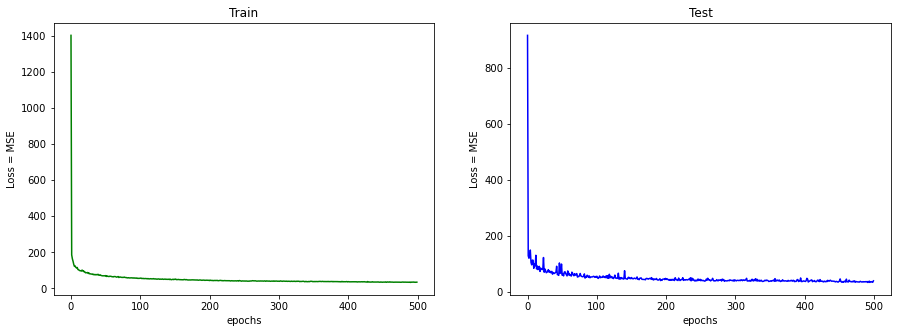

In [93]:
#breakfast hour
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(a_history_nn.history['loss'], color = 'green')
ax[1].plot(a_history_nn.history['val_loss'], color = 'blue')

ax[0].set_title('Train')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Loss = MSE')

ax[1].set_title('Test')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Loss = MSE');

In [94]:
# https://medium.com/towards-data-science/loss-functions-and-their-use-in-neural-networks-a470e703f1e9
y_true = a_y_nn_test
y_pred = a_model_nn.predict(a_X_nn_test_sc)

# R2
R2 = metrics.r2_score(a_y_nn_test, a_y_nn_pred)
print(f'R^2: {R2}')

# MAE
mae = MeanAbsoluteError()
print(f'Mean Absolute Error: {mae(y_true, y_pred)}')

# Huber
huber = Huber()
print(f'Huber Loss: {huber(y_true, y_pred)}')

118/118 [==============================] - 0s 988us/step
R^2: 0.9264478033807846
Mean Absolute Error: 25.165803909301758
Huber Loss: 24.670167922973633
